To compute the Singular Value Decomposition (SVD) of a matrix step-by-step in Python, especially for educational purposes, it's insightful to break down the process. We'll go through the necessary steps using a $3 \times 2$ matrix as an example. The steps include:

1. **Define the matrix $A$.**
   This step involves specifying the matrix $A$ that we want to decompose. For our example, we will use a $3 \times 2$ matrix.

2. **Compute $A^TA$ to find the eigenvectors and eigenvalues of $A^TA$, which will give us the matrix $V$.**
   By multiplying $A^T$ (the transpose of $A$) with $A$, we get a square matrix whose eigenvectors and eigenvalues can be computed. The eigenvectors of $A^TA$ form the columns of the matrix $V$.

3. **Compute $AA^T$ to find the eigenvectors and eigenvalues of $AA^T$, which will give us the matrix $U$.**
   Similarly, by multiplying $A$ with $A^T$, we obtain another square matrix. The eigenvectors of $AA^T$ form the columns of the matrix $U$.

4. **Compute the singular values $\Sigma$ from the square roots of the eigenvalues of $A^TA$ or $AA^T$.**
   The singular values are calculated as the square roots of the eigenvalues from $A^TA$ (or equivalently from $AA^T$, as they should have the same non-zero eigenvalues). These singular values are placed on the diagonal of a diagonal matrix $\Sigma$.

5. **Assemble the SVD from the computed matrices $U$, $\Sigma$, and $V^T$.**
   Finally, the SVD of matrix $A$ is represented as the product of three matrices: $U$, $\Sigma$, and $V^T$, where $V^T$ is the transpose of matrix $V$.

Each of these steps contributes to understanding the SVD's calculation, offering a clear insight into the decomposition's mathematical foundation.


**The principal components in PCA correspond to the columns of 𝑉  from the SVD.**

In [1]:
import numpy as np

A = np.array([[-4,-7],[1,4]])
print("Matrix A:\n", A)


Matrix A:
 [[-4 -7]
 [ 1  4]]


In [2]:
ATA = A.T @ A
eigenvalues_ATA, eigenvectors_ATA = np.linalg.eig(ATA)

print("A^TA:\n", ATA)
print("Eigenvectors of A^TA:\n", eigenvectors_ATA)
print("Eigenvalues of A^TA:\n", eigenvalues_ATA)


A^TA:
 [[17 32]
 [32 65]]
Eigenvectors of A^TA:
 [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]
Eigenvalues of A^TA:
 [ 1. 81.]


In [3]:
AAT = A @ A.T
eigenvalues_AAT, eigenvectors_AAT = np.linalg.eig(AAT)

print("AA^T:\n", AAT)
print("Eigenvectors of AA^T:\n", eigenvectors_AAT)
print("Eigenvalues of AA^T:\n", eigenvalues_AAT)


AA^T:
 [[ 65 -32]
 [-32  17]]
Eigenvectors of AA^T:
 [[ 0.89442719  0.4472136 ]
 [-0.4472136   0.89442719]]
Eigenvalues of AA^T:
 [81.  1.]


In [4]:
singular_values = np.sqrt(eigenvalues_ATA)
Sigma = np.zeros(A.shape)
np.fill_diagonal(Sigma, singular_values)

print("Singular Values:\n", singular_values)
print("Matrix Sigma:\n", Sigma)


Singular Values:
 [1. 9.]
Matrix Sigma:
 [[1. 0.]
 [0. 9.]]


In [5]:
U = eigenvectors_AAT
V = eigenvectors_ATA
Vt = V.T

print("Matrix U:\n", U)
print("Matrix Sigma:\n", Sigma)
print("Matrix V^T:\n", Vt)


Matrix U:
 [[ 0.89442719  0.4472136 ]
 [-0.4472136   0.89442719]]
Matrix Sigma:
 [[1. 0.]
 [0. 9.]]
Matrix V^T:
 [[-0.89442719  0.4472136 ]
 [-0.4472136  -0.89442719]]


In [3]:
import numpy as np
U, S, Vt = np.linalg.svd(image, full_matrices=False)
print(U.shape)
print(S.shape)
print(Vt.shape)
print('First 100 Singular values are:',S[:100])

(512, 512)
(512,)
(512, 512)
First 100 Singular values are: [241.25751778  71.12185581  45.97712758  38.00791552  31.25038842
  29.98925186  28.45683894  21.94304069  21.85073754  18.91835586
  17.04670683  15.53577904  14.99775336  13.720993    12.69611465
  11.45302642  11.2609311   10.66929566  10.02534837   9.58232273
   9.47172505   9.1086947    8.79672847   8.25057604   7.65992354
   7.64364728   7.4935878    7.10951323   6.63392425   6.41002494
   6.18823295   6.09589813   5.92623287   5.8310188    5.66977654
   5.40986662   5.30172253   5.20514741   5.05881821   4.93650703
   4.80296119   4.72339864   4.59458402   4.43094981   4.28492367
   4.24325748   4.18275932   4.05615143   3.97235464   3.9051015
   3.87925304   3.79659266   3.68702514   3.62579539   3.57102749
   3.54158102   3.44073922   3.39176705   3.23780833   3.18696673
   3.14607006   3.08921402   3.01811963   2.99423509   2.91893353
   2.86297513   2.82260027   2.76663222   2.7322848    2.64477451
   2.58414569   2

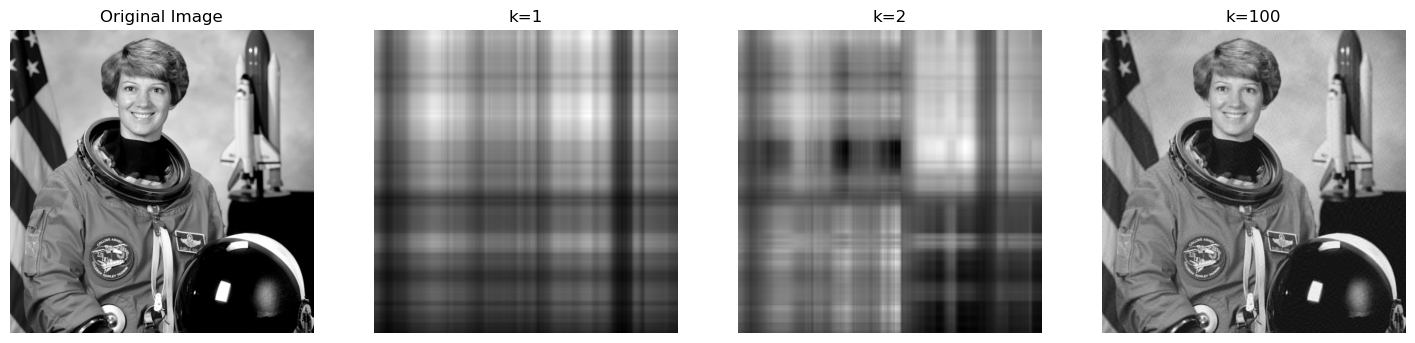

In [4]:
def reconstruct_image(U, S, Vt, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return U_k @ S_k @ Vt_k

# Display the original and reconstructed images for different values of k
plt.figure(figsize=(18, 6))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Reconstructed images with different k values
for i, k in enumerate([1, 2, 100], start=2):
    image_reconstructed = reconstruct_image(U, S, Vt, k)
    plt.subplot(1, 4, i)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')

plt.show()


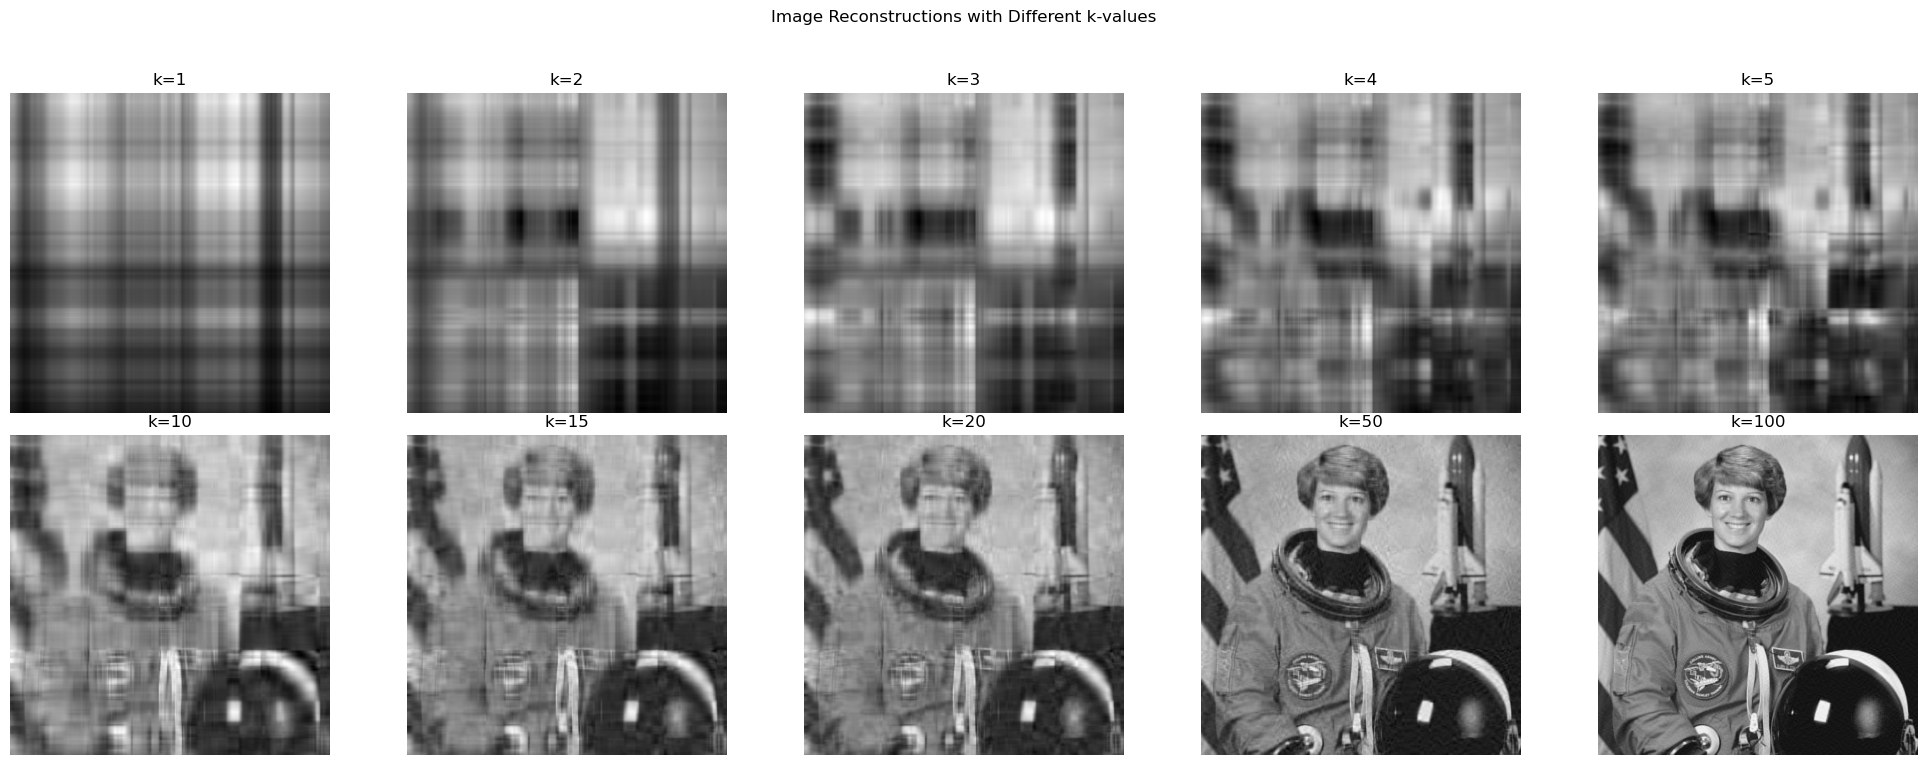

In [40]:
import numpy as np
from matplotlib import pyplot as plt

# Assuming U, S, Vt are already computed via SVD on your image

# Function to reconstruct the image from U, S, Vt with top k singular values
def reconstruct_image(U, S, Vt, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))

# Define the k-values for reconstruction
k_values = [1, 2, 3, 4, 5, 10, 15, 20, 50,100]

# Setup the plot - assuming 2 rows and 5 columns to display 10 images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Image Reconstructions with Different k-values')

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Display the original and reconstructed images
for ax, k in zip(axes_flat, k_values):
    # Reconstruct the image with current k
    image_reconstructed = reconstruct_image(U, S, Vt, k)
    # Display the reconstructed image
    ax.imshow(image_reconstructed, cmap='gray')
    ax.set_title(f'k={k}')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the main title
plt.show()


In [7]:
A=1/9*np.array([[-4,-7],[1,4]])

In [8]:
np.dot(A,np.array([-2/np.sqrt(5),1/np.sqrt(5)]))

array([0.0496904, 0.0993808])

In [21]:
U = np.array([[0.04,-8.04],[0.09,4.02]])
sigma = np.array([[9,0],[0,1]])
V = np.array([[1/np.sqrt(5),-2/np.sqrt(5)],[2/np.sqrt(5),1/np.sqrt(5)]])
U

array([[ 0.04, -8.04],
       [ 0.09,  4.02]])

In [14]:
# A = U*sigma*VT
X=np.dot(U,sigma)
X

array([[ 0.36, -8.04],
       [ 0.81,  4.02]])

In [15]:
np.dot(X,V)

array([[ 7.35219151, -3.27360352],
       [-3.2333543 ,  2.52228468]])

In [18]:
A = np.array([[-4,-7],[1,4]])

In [30]:
A = np.array([[1,2,3],[4,5,6]])

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A)

U, S, VT

(array([[-0.3863177 ,  0.92236578],
        [-0.92236578, -0.3863177 ]]),
 array([9.508032  , 0.77286964]),
 array([[-0.42866713, -0.56630692, -0.7039467 ],
        [-0.80596391, -0.11238241,  0.58119908],
        [ 0.40824829, -0.81649658,  0.40824829]]))

In [26]:
X=1/9*np.array([[-4,-7],[1,4]])

In [27]:
Y = np.array([1/np.sqrt(5),2/np.sqrt(5)])

In [28]:
Y

array([0.4472136 , 0.89442719])

In [29]:
np.dot(X,Y)

array([-0.89442719,  0.4472136 ])